# Python Vectorization

In [1]:
import numpy as np

In [2]:
N = 1000
M = 5000

In [3]:
W = np.random.rand(M,N)

In [4]:
x = np.random.rand(N)

In [5]:
%%time
y_ = np.zeros([M])
for m in range(M):
    for n in range(N):
        y_[m] += W[m,n] * x[n]
print(y_[0])

261.91032997754536
Wall time: 10.5 s


In [6]:
%%time 
y = W @ x
print(y[0])

261.91032997754536
Wall time: 12.5 ms


In [7]:
assert np.allclose(y_,y)

# Perceptron Classification

### Input

In [8]:
N = 2 # Number of Input Vectors
M = 5 # Number of Features

In [9]:
def init_weights(M):
    W = np.random.uniform(low = -0.3, high = 0.3, size = M)
    W = np.concatenate(([1.],W)) # Add w0 as bias term
    return W

In [10]:
def init_multi_level_weights(num_hidd_layers, perc_per_layer,M):
    W = []
    biases = []
    # Input Layer
    W.append(np.random.uniform(low = -0.3, high = 0.3, size = (perc_per_layer,M)))
    biases.append(np.ones((1,perc_per_layer)))
    
    # Hidden Layers 
    for l in range(1,num_hidd_layers):
        W.append(np.random.uniform(low = -0.3, high = 0.3, size = (perc_per_layer,perc_per_layer)))
        biases.append(np.ones((1,perc_per_layer)))
    
    # Output Layer
    W.append(np.random.uniform(low = -0.3, high = 0.3, size = perc_per_layer))
    biases.append(np.ones((1)))
    
    return W,biases

In [11]:
def get_input(N,M):
    x = np.random.rand(N,M)
    return x

### Ploting Functions

In [12]:
import matplotlib.pyplot as plt

In [13]:
def plot_loss(loss: np.array):
    plt.title("Loss")
    plt.xlabel("Iteration")
    plt.plot(loss)
    plt.show()

### Perceptron

Simple Perceptron for Binary Classification.

#### Sigmoid Activation Function

In [14]:
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

In [15]:
def d_sigmoid(x):
    return sigmoid(x) * (1 - sigmoid(x))

#### Forward Pass

In [16]:
def forward_pass(W,x):
    y = W @ x.T
    return sigmoid(y)

##### Output Classification

In [17]:
def predicted_classes(outputs):
    predicted_classes = np.where(outputs >= 0.5, 1, 0)
    return predicted_classes

##### Backward Pass

In [18]:
step_size = 0.5

In [19]:
labels = np.array([0,0])

In [20]:
def gradient(labels,outputs):
    error = labels - outputs
    return np.sum(-error*(1-outputs)*outputs*x.T, axis=1)

#### Training

In [21]:
iterations = 10

0: Labels:  [0 0] Predicted Classes:  [1 1] Outputs:  [0.67774959 0.67483157]
1: Labels:  [0 0] Predicted Classes:  [1 1] Outputs:  [0.59549964 0.60122293]
2: Labels:  [0 0] Predicted Classes:  [1 1] Outputs:  [0.51009824 0.52502527]
3: Labels:  [0 0] Predicted Classes:  [0 0] Outputs:  [0.43281092 0.4554328 ]
4: Labels:  [0 0] Predicted Classes:  [0 0] Outputs:  [0.36970225 0.39761112]
5: Labels:  [0 0] Predicted Classes:  [0 0] Outputs:  [0.32066988 0.35175271]
6: Labels:  [0 0] Predicted Classes:  [0 0] Outputs:  [0.28292833 0.31572662]
7: Labels:  [0 0] Predicted Classes:  [0 0] Outputs:  [0.2535538  0.28715574]
8: Labels:  [0 0] Predicted Classes:  [0 0] Outputs:  [0.23026478 0.26412056]
9: Labels:  [0 0] Predicted Classes:  [0 0] Outputs:  [0.21143272 0.24521474]


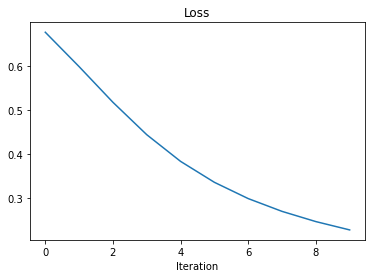

In [22]:
W = init_weights(M)
x = get_input(N,M)
x = np.column_stack((np.ones((N)),x)) # Add x0 for bias term

loss = []

for i in range(iterations):
    outputs = forward_pass(W,x)
    delta_W = step_size*gradient(labels, outputs)
    W = W - delta_W 
    predicted_classes_ = predicted_classes(outputs)
    print(str(i) + ": Labels: ", labels,
          "Predicted Classes: ",  predicted_classes_,
          "Outputs: ", outputs)
    loss.append(np.mean(outputs))

plot_loss(loss)

### Multilayer Perceptron (MLP)

In [23]:
N = 1 # Number of Input Vectors
M = 10 # Number of Features

In [24]:
num_hidd_layers = 3
perc_per_layer = 5

##### Forward Pass

In [25]:
def forward_pass_mlp(W, biases, x):
    inputs = []
    y = []

    # Input Layer
    inputs.append(x)

    # Hidden Layer
    for layer in range(num_hidd_layers):
        z = inputs[layer] @ W[layer].T + biases[layer]
        y.append(z)
        inputs.append(sigmoid(z))

    # Output Layer
    z = inputs[-1] @ W[-1] + biases[-1]
    output = sigmoid(z)
    return [output, inputs, y]

In [26]:
# Forward Pass Test
W,biases = init_multi_level_weights(num_hidd_layers, perc_per_layer, M)
x = get_input(N,M)

output, inputs, y = forward_pass_mlp(W, biases, x)
print("Output:", output)

Output: [0.72084173]


##### Backward Pass

In [27]:
step_size = 0.2

In [28]:
labels = np.array([0])

In [29]:
def backward_pass(labels, output, W, inputs, y):
    # Output Layer
    delta = (output[0] - labels[0]) * d_sigmoid(output[0])
    delta = inputs[-1] * delta
    W[-1] = W[-1] + step_size * delta[0]
    biases[-1] = biases[-1] - step_size * np.sum(delta,axis=1)
    
    # Hidden Layers
    for l in reversed(range(num_hidd_layers)):
        delta = (delta[0] * W[l].T * d_sigmoid(y[l])) * inputs[l].T
        W[l] = W[l] - step_size * delta.T
        biases[l] = biases[l] + step_size * np.sum(delta,axis=0)
    
    return W,biases

#### Training

In [30]:
iterations = 1000

In [31]:
def print_network_info(x):
    print("Number of Features per Instance: ", len(x[0]))
    print("Number of Hidden Layers: ", num_hidd_layers)
    print("Number of Perceptrons per Hidden Layer: ", perc_per_layer, "\n")
    print("Step Size: ", step_size, "\n")

Number of Features per Instance:  10
Number of Hidden Layers:  3
Number of Perceptrons per Hidden Layer:  5 

Step Size:  0.2 

Label:  0
Init Prediction:  0.7543192164339294
Trained Prediction:  0.024326142224827714
Predicted Class:  0


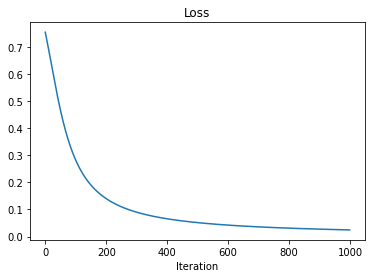

In [32]:
W, biases = init_multi_level_weights(num_hidd_layers, perc_per_layer,M)
x = get_input(N,M)

print_network_info(x)

print("Label: ", labels[0])
print("Init Prediction: ", forward_pass_mlp(W,biases,x)[0][0])

loss = []

for i in range(iterations):
    output, inputs, y = forward_pass_mlp(W, biases, x)
    W, biases = backward_pass(labels, output, W, inputs, y)
    loss.append(output[0] - labels)
    
print("Trained Prediction: ", output[0])
print("Predicted Class: ", predicted_classes(output)[0])

plot_loss(loss)